In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

# from sklearn import datasets
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"

# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE

In [2]:
# import importlib.util
# importlib.reload(hv)
# import imp; imp.reload(hv)
# import numpy as np
import holoviews as hv
hv.notebook_extension()

In [3]:
%%time
# Load BES Panel for Wave 10
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta") # 130Mb
BES_Panel= pd.read_pickle("BES_gEV_wave_weights.pkl")

#(31409, 733)

# BES_Panel = pd.read_stata(BES_data_folder+BES2015_W8_v1.6.dta")

print( BES_Panel.shape )

(64689, 24)
Wall time: 14 ms


b":HoloMap   [wave]\n   :ItemTable   (I would not vote,Conservative,Labour,Liberal Democrat,Scottish National Party (SNP),Plaid Cymru,United Kingdom Independence Party (UKIP),Green Party,Other,Don't know)"
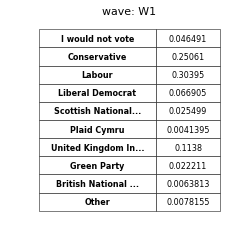
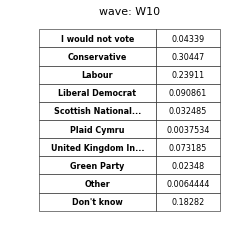
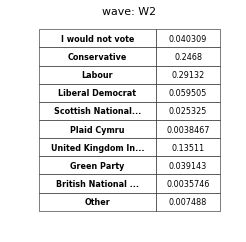
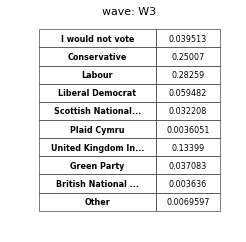
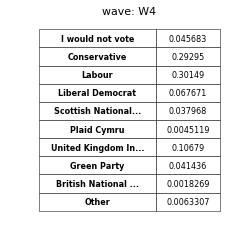
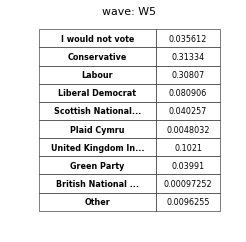
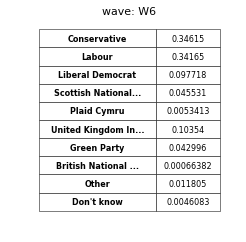
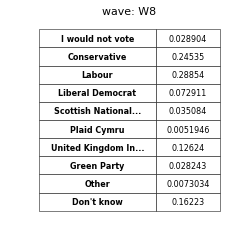

In [4]:
tables = hv.HoloMap(kdims=['wave'])
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

    vdims = BES_Panel["generalElectionVote"+ wave].cat.categories
    crosstab = pd.crosstab(index   = BES_Panel["generalElectionVote"+wave],
                     columns = BES_Panel["wave" + wave.replace("W","")],
                     values  = BES_Panel["wt_full_"+wave],
                     aggfunc = sum,
                     normalize=True)    

    tables[wave] = hv.ItemTable( zip( vdims, tuple(crosstab[1.0][vdims].values) ) )
tables

In [ ]:
# for development, lets pare down the BES_Panel dataset to just the columns we're working with now
cols = []
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:
    cols.append( "generalElectionVote"+wave )
    cols.append( "wave" + wave.replace("W","") )
    cols.append( "wt_full_"+wave )
    
BES_Panel[cols].to_pickle("BES_gEV_wave_weights.pkl")

# read back in later with this
# BES_Panel= pd.read_pickle("BES_gEV_wave_weights.pkl")

In [5]:
# get full list of *all* generalElectionVote options
cats = []
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

    cats.extend(list(BES_Panel["generalElectionVote"+ wave].cat.categories))
    
all_generalElectionVote_options = list(set(cats))

:Layout
   .HoloMap.I  :HoloMap   [wave]
      :Table   [generalElectionVote]   (frequency)
   .HoloMap.II :HoloMap   [wave]
      :Bars   [generalElectionVote]   (frequency)
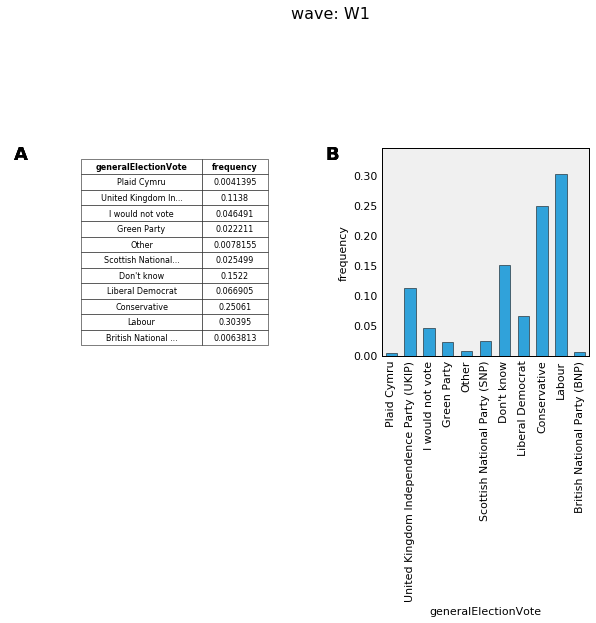
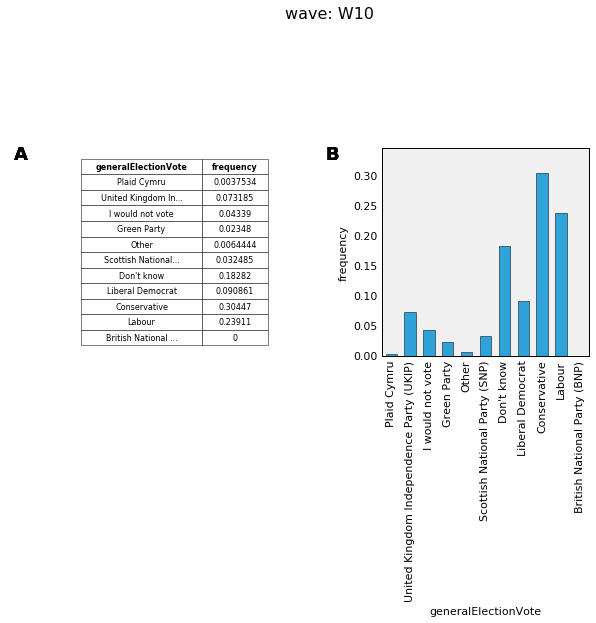
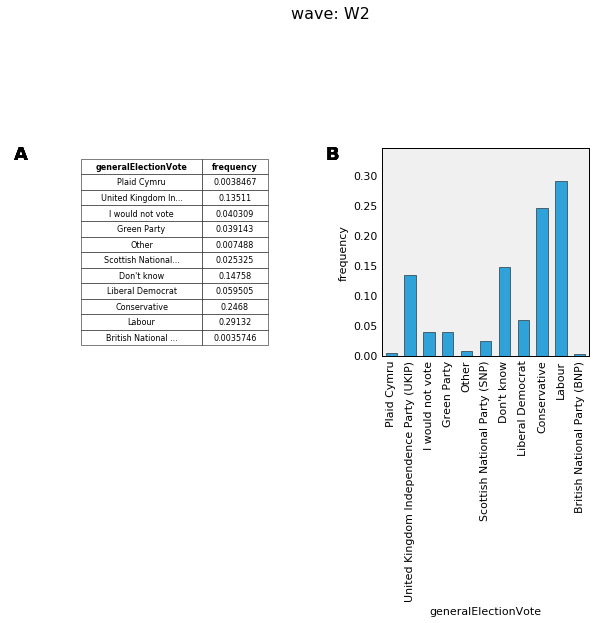
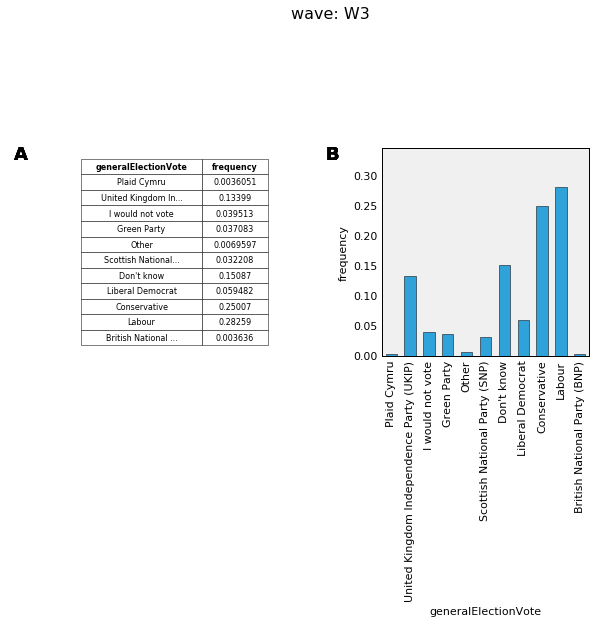
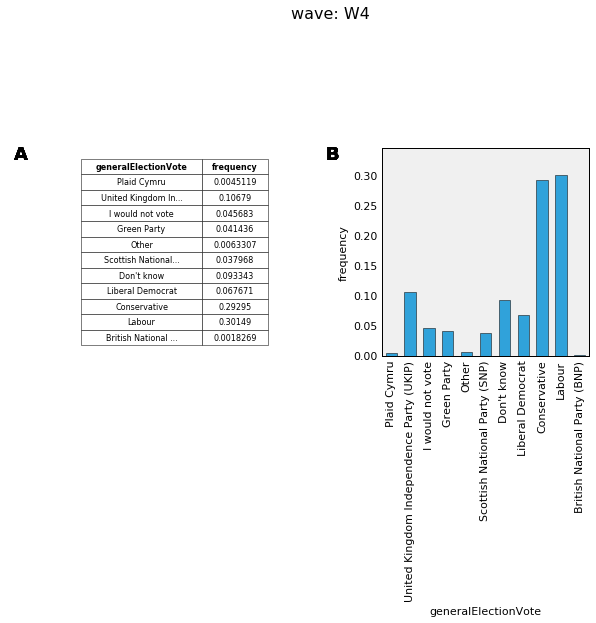
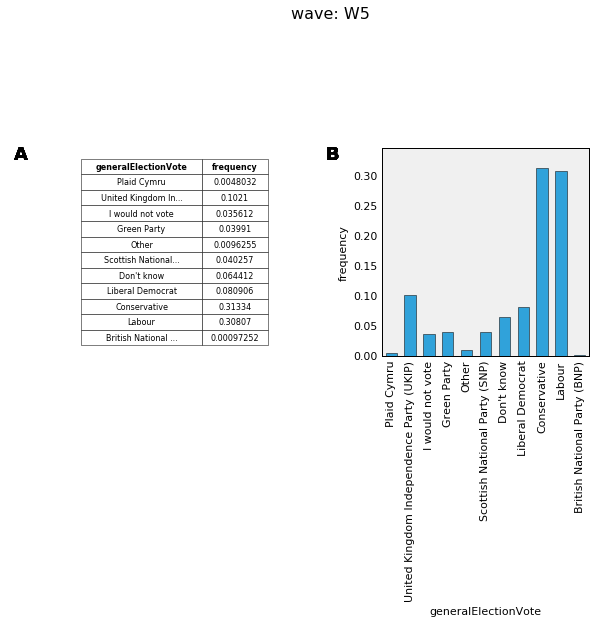
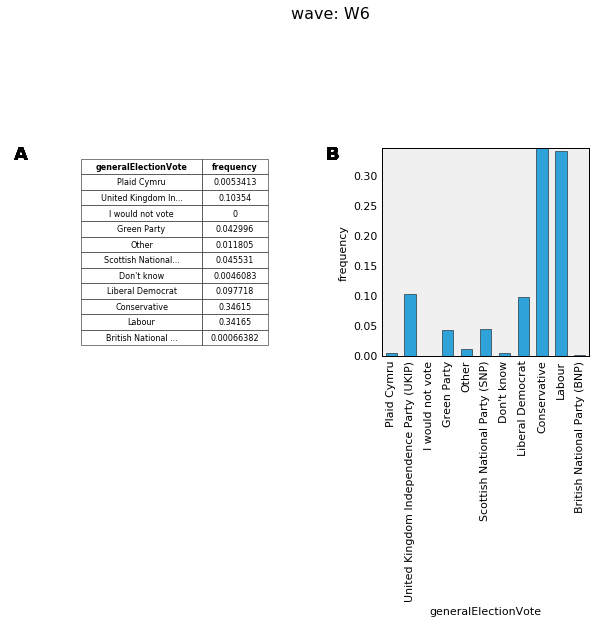
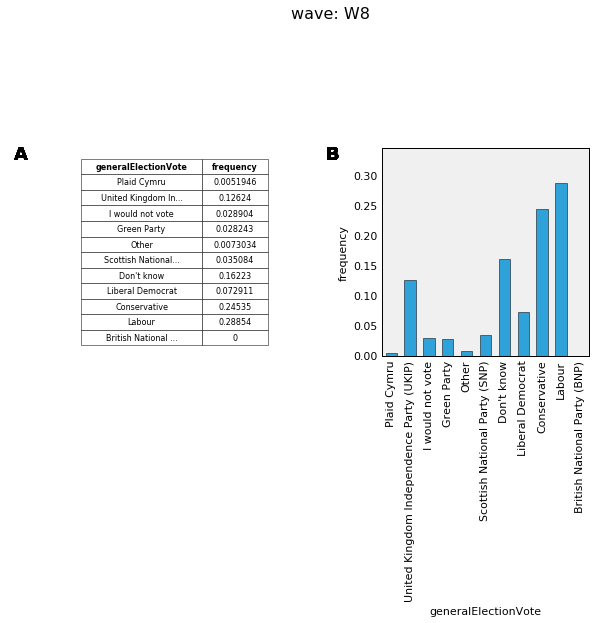

In [9]:
tables = hv.HoloMap(kdims=['wave'])
bars   = hv.HoloMap(kdims=['wave'])

vote_dim = hv.Dimension("generalElectionVote",values = all_generalElectionVote_options)
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

    # make sure every generalElectionVote has the same set of categories
    # or holoviews will crash with a *really* unhelpful error message
    BES_Panel["generalElectionVote"+wave].cat.set_categories(all_generalElectionVote_options, inplace=True)

    crosstab = pd.crosstab(index   = BES_Panel["generalElectionVote"+wave],
                     columns = BES_Panel["wave" + wave.replace("W","")],
                     values  = BES_Panel["wt_full_"+wave],
                     aggfunc = sum,
                     normalize=True)
    
    ct = pd.DataFrame([crosstab.index,crosstab[1.0]]).T
    ct.columns=["generalElectionVote","frequency"]
    
    tables[wave] = hv.Table( ct, kdims=[vote_dim], vdims =["frequency"] )
    bars[wave]   = hv.Bars(  ct, kdims=[vote_dim], vdims =["frequency"] )   

# rotate labels so they don't overlap
%opts Bars [xrotation=90]

tables + bars

In [31]:
BES_Panel[cols].to_pickle("BES_gEV_wave_weights.pkl")


In [25]:
a = ['I would not vote', 'Conservative', 'Labour', 'Liberal Democrat',
 'Scottish National Party (SNP)', 'Plaid Cymru',
 'United Kingdom Independence Party (UKIP)', 'Green Party', 'Other',
 "Don't know"]
b = 'I would not vote'
np.array([x==b for x in a],dtype = 'bool')

array([ True, False, False, False, False, False, False, False, False, False], dtype=bool)

In [8]:
vote_dim.values

['British National Party (BNP)',
 'Conservative',
 "Don't know",
 'Green Party',
 'I would not vote',
 'Labour',
 'Liberal Democrat',
 'Other',
 'Plaid Cymru',
 'Scottish National Party (SNP)',
 'United Kingdom Independence Party (UKIP)']

In [303]:

bars = hv.Bars(data, kdims=[hv.Dimension('Car occupants', values='initial')], vdims=['Count'])

ct = pd.DataFrame([ range(len(crosstab[1.0])), crosstab[1.0].values] ).T
ct.columns=["generalElectionVote","frequency"]
ct

,generalElectionVote,frequency
0,0.0,0.043390
1,1.0,0.304470
2,2.0,0.239114
3,3.0,0.090861
4,4.0,0.032485
5,5.0,0.003753
6,6.0,0.073185
7,7.0,0.023480
8,8.0,0.006444
9,9.0,0.182817


In [337]:
BES_Panel.dtypes

id                                   int32
wt_core_W3                         float64
wt_core_W4                         float64
wt_core_W5                         float64
wt_core_W6                         float64
wt_core_W7                         float64
wt_core_W8                         float64
wt_core_W9                         float64
wt_core_W1                         float64
wt_core_W2                         float64
wt_full_W3                         float64
wt_full_W1W2W3                     float64
wt_full_W4                         float64
wt_full_W1W2W3W4                   float64
wt_full_W5                         float64
wt_full_W1W2W3W4W5                 float64
wt_full_W4W5                       float64
wt_full_W6                         float64
wt_full_W1W2W3W4W5W6               float64
wt_full_W4W5W6                     float64
wt_full_W4W6                       float64
wt_full_W7                         float64
wt_full_W8                         float64
wt_full_W1W

In [317]:
list(BES_Panel["generalElectionVote"+ wave].cat.categories)

['I would not vote',
 'Conservative',
 'Labour',
 'Liberal Democrat',
 'Scottish National Party (SNP)',
 'Plaid Cymru',
 'United Kingdom Independence Party (UKIP)',
 'Green Party',
 'British National Party (BNP)',
 'Other',
 "Don't know"]

In [166]:
"W10".replace("W","")

'10'

In [177]:
BES_Panel.generalElectionVoteW6.cat.categories

Index(['Conservative', 'Labour', 'Liberal Democrat',
       'Scottish National Party (SNP)', 'Plaid Cymru',
       'United Kingdom Independence Party (UKIP)', 'Green Party',
       'British National Party (BNP)', 'Other', 'Don't know'],
      dtype='object')

In [334]:
hv.Bars.help

AttributeError: type object 'Bars' has no attribute 'help'

In [86]:
BES_W10 = pd.read_stata(BES_data_folder+"BES2015_W10_v0.3.dta") # 130Mb

In [79]:
BES_Panel.generalElectionVoteW10.dropna().shape

(30319,)

In [69]:
BES_Panel.wave10.dropna().shape

(63804,)

In [76]:
BES_Panel.new_full_weightW10.dropna().shape

(30319,)

In [109]:
BES_Panel.generalElectionVoteW10.replace(np.nan,'-1').value_counts()

-1                                          34370
Conservative                                 8713
Labour                                       6587
Don't know                                   5811
United Kingdom Independence Party (UKIP)     2656
Liberal Democrat                             2510
I would not vote                             1383
Scottish National Party (SNP)                1217
Green Party                                  1028
Other                                         251
Plaid Cymru                                   163
Name: generalElectionVoteW10, dtype: int64

In [99]:
BES_Panel.new_full_weightW10[ BES_Panel.wave10.isnull() ]

63804   NaN
63805   NaN
63806   NaN
63807   NaN
63808   NaN
63809   NaN
63810   NaN
63811   NaN
63812   NaN
63813   NaN
63814   NaN
63815   NaN
63816   NaN
63817   NaN
63818   NaN
63819   NaN
63820   NaN
63821   NaN
63822   NaN
63823   NaN
63824   NaN
63825   NaN
63826   NaN
63827   NaN
63828   NaN
63829   NaN
63830   NaN
63831   NaN
63832   NaN
63833   NaN
         ..
64659   NaN
64660   NaN
64661   NaN
64662   NaN
64663   NaN
64664   NaN
64665   NaN
64666   NaN
64667   NaN
64668   NaN
64669   NaN
64670   NaN
64671   NaN
64672   NaN
64673   NaN
64674   NaN
64675   NaN
64676   NaN
64677   NaN
64678   NaN
64679   NaN
64680   NaN
64681   NaN
64682   NaN
64683   NaN
64684   NaN
64685   NaN
64686   NaN
64687   NaN
64688   NaN
Name: new_full_weightW10, dtype: float64

In [92]:
BES_Panel.wave10.isnull().sum()

885

In [94]:
BES_Panel.new_full_weightW10.isnull().sum()

34370

In [95]:
BES_Panel.generalElectionVoteW10.isnull().sum()

34370

In [146]:
wave10 = pd.crosstab(index   = BES_Panel.generalElectionVoteW10,
                     columns = BES_Panel.wave10,
                     values  = BES_Panel.wt_full_W10,
                     aggfunc = sum,
                     normalize=True)
print(wave10)

wave10                                    0.0       1.0
generalElectionVoteW10                                 
I would not vote                          0.0  0.043390
Conservative                              0.0  0.304470
Labour                                    0.0  0.239114
Liberal Democrat                          0.0  0.090861
Scottish National Party (SNP)             0.0  0.032485
Plaid Cymru                               0.0  0.003753
United Kingdom Independence Party (UKIP)  0.0  0.073185
Green Party                               0.0  0.023480
Other                                     0.0  0.006444
Don't know                                0.0  0.182817


In [144]:
wave10 = pd.crosstab(index   = BES_W10.generalElectionVote,
                     columns = BES_W10.wave10,
                     values  = BES_W10.wt_full_W10,
                     aggfunc = sum,
                     normalize=True)
print(wave10)

wave10                                           1
generalElectionVote                               
I would not vote                          0.043390
Conservative                              0.304470
Labour                                    0.239114
Liberal Democrat                          0.090861
Scottish National Party (SNP)             0.032485
Plaid Cymru                               0.003753
United Kingdom Independence Party (UKIP)  0.073185
Green Party                               0.023480
Other                                     0.006444
Don't know                                0.182817


In [26]:
wave10 = pd.crosstab(index   = BES_Panel.generalElectionVoteW10,
                     columns = BES_Panel.wave10,
                     values  = BES_Panel.new_full_weightW10,
                     aggfunc = sum,
                     normalize=True)
print(wave10)

wave10                                    0.0       1.0
generalElectionVoteW10                                 
I would not vote                          0.0  0.077701
Conservative                              0.0  0.271136
Labour                                    0.0  0.199856
Liberal Democrat                          0.0  0.070677
Scottish National Party (SNP)             0.0  0.029162
Plaid Cymru                               0.0  0.003971
United Kingdom Independence Party (UKIP)  0.0  0.094040
Green Party                               0.0  0.028979
Other                                     0.0  0.007004
Don't know                                0.0  0.217476


In [148]:
wave10 = pd.crosstab(index   = BES_W10.generalElectionVote,
                     columns = BES_W10.wave10,
                     values  = BES_W10.new_full_weight,
                     aggfunc = sum,
                     normalize=True)
print(wave10)

wave10                                           1
generalElectionVote                               
I would not vote                          0.077701
Conservative                              0.271136
Labour                                    0.199856
Liberal Democrat                          0.070677
Scottish National Party (SNP)             0.029162
Plaid Cymru                               0.003971
United Kingdom Independence Party (UKIP)  0.094040
Green Party                               0.028979
Other                                     0.007004
Don't know                                0.217476


In [61]:
wave5 = pd.crosstab(index   = BES_Panel.generalElectionVoteW5,
                     columns = BES_Panel.wave5,
                     values  = BES_Panel.new_full_weightW10,
                     aggfunc = sum,
                     normalize=True)
print(wave5)

wave5                                          0.0       1.0
generalElectionVoteW5                                       
I would not vote                          0.003042  0.072452
Conservative                              0.000224  0.287021
Labour                                    0.000910  0.257281
Liberal Democrat                          0.000178  0.061428
Scottish National Party (SNP)             0.000000  0.054467
Plaid Cymru                               0.000000  0.007171
United Kingdom Independence Party (UKIP)  0.000000  0.126636
Green Party                               0.000083  0.031770
British National Party (BNP)              0.000000  0.001416
Other                                     0.000000  0.009747
Don't know                                0.000088  0.086086


In [64]:
wave5 = pd.crosstab(index   = BES_Panel.generalElectionVoteW5,
                     columns = BES_Panel.wave5,
                     values  = BES_Panel.wt_full_W5,
                     aggfunc = sum,
                     normalize=True)
print(wave5)

wave5                                     0.0       1.0
generalElectionVoteW5                                  
I would not vote                          0.0  0.035612
Conservative                              0.0  0.313337
Labour                                    0.0  0.308067
Liberal Democrat                          0.0  0.080906
Scottish National Party (SNP)             0.0  0.040257
Plaid Cymru                               0.0  0.004803
United Kingdom Independence Party (UKIP)  0.0  0.102097
Green Party                               0.0  0.039910
British National Party (BNP)              0.0  0.000973
Other                                     0.0  0.009626
Don't know                                0.0  0.064412


In [ ]:
wave5 = pd.crosstab(index   = BES_Panel.generalElectionVoteW10,
                     columns = BES_Panel.wave5,
                     values  = BES_Panel.wt_full_W5,
                     aggfunc = sum,
                     normalize=True)
print(wave5)

In [45]:
[x for x in BES_Panel.columns if "wt" in x]

['wt_core_W3',
 'wt_core_W4',
 'wt_core_W5',
 'wt_core_W6',
 'wt_core_W7',
 'wt_core_W8',
 'wt_core_W9',
 'wt_core_W1',
 'wt_core_W2',
 'wt_full_W3',
 'wt_full_W1W2W3',
 'wt_full_W4',
 'wt_full_W1W2W3W4',
 'wt_full_W5',
 'wt_full_W1W2W3W4W5',
 'wt_full_W4W5',
 'wt_full_W6',
 'wt_full_W1W2W3W4W5W6',
 'wt_full_W4W5W6',
 'wt_full_W4W6',
 'wt_full_W7',
 'wt_full_W8',
 'wt_full_W1W2W3W4W5W6W7W8',
 'wt_full_W7W8',
 'wt_full_W9',
 'wt_full_W1W2W3W4W5W6W7W8W9',
 'wt_full_W7W8W9',
 'wt_full_W10',
 'wt_full_W1',
 'wt_full_W2',
 'wt_full_W1W2',
 'wt_full_W1W2W3W4W5W6W7',
 'wt_daily_W5',
 'enviroGrowthW4',
 'enviroGrowthW7']

In [22]:
wave10[1].sum()

0.9999999999999999

In [28]:
BES_Panel.wave10.value_counts()

0.0    33485
1.0    30319
Name: wave10, dtype: int64

In [29]:
BES_Panel.shape

(64689, 4247)

In [30]:
BES_Panel.wave10.isnull().sum()

885

In [33]:
BES_Panel.wave10.value_counts().values.sum()

63804

In [53]:
BES_Panel.new_full_weightW10

0        1.199635
1        0.727188
2        0.758747
3             NaN
4             NaN
5             NaN
6        0.824444
7        0.683303
8        0.625638
9             NaN
10       0.877160
11            NaN
12            NaN
13       0.866945
14       0.641208
15            NaN
16       0.906434
17       0.956191
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29       0.571502
           ...   
64659         NaN
64660         NaN
64661         NaN
64662         NaN
64663         NaN
64664         NaN
64665         NaN
64666         NaN
64667         NaN
64668         NaN
64669         NaN
64670         NaN
64671         NaN
64672         NaN
64673         NaN
64674         NaN
64675         NaN
64676         NaN
64677         NaN
64678         NaN
64679         NaN
64680         NaN
64681         NaN
64682         NaN
64683     

In [54]:
BES_Panel.wt_full_W10

0        0.086091
1        0.741154
2        8.693233
3             NaN
4             NaN
5             NaN
6        0.208183
7        0.636257
8        0.414223
9             NaN
10       0.960867
11            NaN
12            NaN
13       0.516427
14       0.791542
15            NaN
16       2.092525
17       0.164776
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29       0.416674
           ...   
64659         NaN
64660         NaN
64661         NaN
64662         NaN
64663         NaN
64664         NaN
64665         NaN
64666         NaN
64667         NaN
64668         NaN
64669         NaN
64670         NaN
64671         NaN
64672         NaN
64673         NaN
64674         NaN
64675         NaN
64676         NaN
64677         NaN
64678         NaN
64679         NaN
64680         NaN
64681         NaN
64682         NaN
64683     